# Optics Lab 2: Polarization
### *James Katz, Patrick Keeney, Mark Schwartz*
___

In [8]:
'''
First import modules used.  If you have any trouble with the modules, they may not be installed.  Just delete the '#'
in front of the module you'd like to use and run this cell again.
'''

#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install csv
#!pip install sklearn
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

## Introduction

Light propogates in space along its momentum vector, $\vec{k}$.  The electric and magnetic field directions, $\hat{E}$ and $\hat{H}$, are both normal to the direction of $\hat{k}$.  The purpose of a polarizer is to orient the electric field directions into one direction, but projecting the electric field direction, $\hat{E}$, onto the polarization direction, $\hat{p}$, such that the intensity of light transmitted at the other side of the polarizer is $I = I_{0}(\hat{E}\cdot\hat{p})^{2} = I_{0}cos^{2}(\theta)$, where $I_{0}$ is the incident intensity of light before the polarizer and $\theta$ is the angle between the initial polarization of light and the polarization direction, $\hat{p}$ of the polarizer.$\newline$
In order to get this result, the incident light must be polarized to begin with.  Jones vectors, $\hat{\mathscr{j}}_{in}$ and $\hat{\mathscr{j}}_{out}$, can be used to represent the electric field of light propogating in and out of optical devices.$\newline$

In 1808, Malus' Law was derived by French engineer, Etienne-Louis Malus.

<u>Derivation of Malus' Law</u>

Assume $\vec{E}$ is polarized as $\hat{\mathscr{j}}_{in} = cos(\alpha)\hat{x} + sin(\alpha)\hat{y}$ and a second polarizer of polarization direction, $\hat{x}^{\prime}$, goes as $\hat{x}^{\prime} = cos(\theta)\hat{x} + sin(\theta)\hat{y}$.$\newline$
The intensity of light is defined by $I = I_{0} = |\hat{\mathscr{j}}_{in}|^{2} = \hat{\mathscr{j}}_{in}\cdot \hat{\mathscr{j}}_{in}^{*} = 1$, where $\hat{\mathscr{j}}_{in}$ is a normalized as $\hat{\mathscr{j}}_{in} = \frac{\vec{E}}{|\vec{E}|}$.$\newline$

Since the electric field $\hat{\mathscr{j}}_{in}$ is already linearly polarized in one direction, it will enter the second polarizer of polarization direction, $\hat{x}$.$\newline$

$I_{final} = I_{0}|\hat{\mathscr{j}}_{in}\cdot \hat{x}^{\prime}|^{2} = I_{0}[(\hat{\mathscr{j}}_{in}\cdot \hat{x}^{\prime})(\hat{\mathscr{j}}_{in}\cdot \hat{x}^{\prime})^{*}]^{2} = I_{0}[(cos\alpha\hat{x}+sin\alpha\hat{x})(cos\theta\hat{x}+sin\theta\hat{x})] = I_{0}(cos\alpha cos\theta + sin\alpha sin\theta)^{2}$ $\newline$
= $I_{0}cos^{2}(\alpha - \theta)$ $\newline$

___

This final intensity is determined by the difference of the two polarization angles, normalized to the initial intensity of the source.  When difference of the angles is 0, the final intensity is equal to the original intensity.  Conversly, when the difference in angles is $\pi/2$, light is extinguished on the other side.  The intensity varies as a function of the difference of anlges and resembles a $cos^{2}$ function.  At any phase during which some or all of the intensity is extinguished, the polarizer absorbs the intensity lost as heat.  Malus' law is fundamental in the study of optics and it is our aim to verify its validity in practice.
___

### Experimental Procedure

In order to verify Malus' Law, our expermimental set-up included a breadboard and ThorLabs software for data collection.

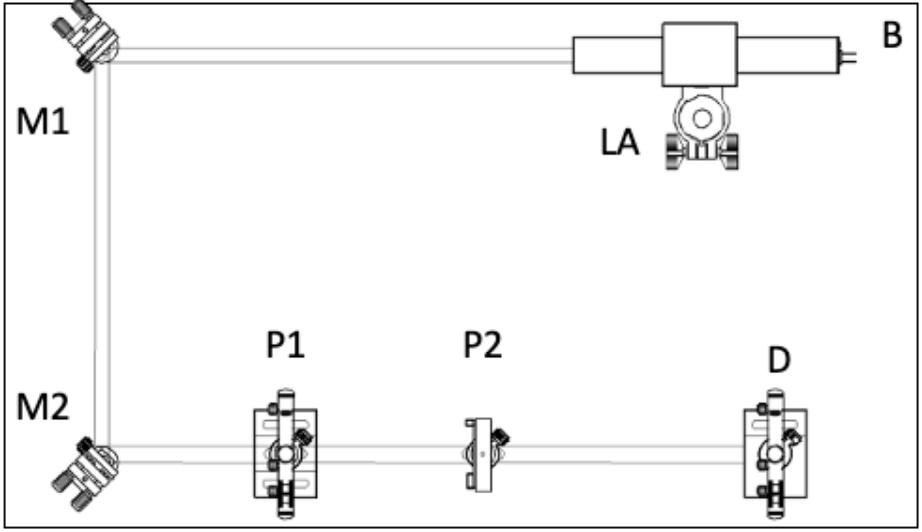

In [10]:
Image(filename='setup.png')

The experimental setup is given by the figure above.  Our laser source is given by 'LA', laser assembly, is an HE-NE laser which monochromatically emits red light.  M1 and M2 represent mirrors positioned at 90 degrees which reflect the laser to the other side of the board, a total of 180 degrees to maximize the length.  The light is then polarized by P1, a rotationally adjustable optical polarizer and then subsequentially polarized by P2, a fixed polarizer.  The light reaches a photodiode, D, which measures the lights power.  This signal is then sent to a computer with ThorLabs software installed to record data at different time intervals. $\newline$
We started off by keeping the rotationally adjustable polarizer, P1, fixed and measuring the light intensity for an extended amount of time in order to find the variability of its fluctuations.  After this, we calibrated the data collection software to take 10 second data collections with two data points.$\newline$
We found the extinction angle for P1 to be $54^{\circ}$.  We used this number to represent our angle of extinction, $90^{\circ}$, and subsequently took our ten second measurements while adjusting the P1 polarizer by two degrees each collection.  Because of the high variability we found in our power fluctuations of our laser source, we decided to use a random number generator to find angles between -20 degrees and 100 degrees by two degrees, leading to 60 data points to fit to Malus' Law.  We decided to go from -20 to 100 degrees instead of 0 to 90 degrees to give further confidence in our $cos^{2}$ distribution.$\newline$
We then analyse the data.  We neglected to find the intitial intensity, so in order to fit our function to a $cos^{2}$ curve, we found a regression curve with maximized the $R^2$ score and then used the maximum point of that function as $I_{0}$.  When we had the $cos^{2}$ curve fit, we then found a second regression curve for our data which minimized the distance between itself and the $cos^{2}$ curve.  Lastly, we used Mean Standard Error to get the error between both the regression curve and the $cos^{2}$ function we hoped to fit.

In [218]:
'''
We extract the measured intensity fluctuations from our source.
'''


df_intensity_arr = []

# We clean the data and extract intensity using a for loop.  There are 5 data files, each with a 10 minute
# measurement time.

for i in range(1,5):
    string = 'PowerSample_' + str(i) + '.csv'
    cols = ['itr','date','Power']

    df = pd.read_csv(string, sep='delimiter', names = cols,engine='python')
    df = df[15:76]

    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)

    df = pd.DataFrame(lines)
    intensity_array = df[3]
    df_intensity = intensity_array.values.tolist()
    df_intensity_arr.append(df_intensity)

    for i in range(0, len(df_intensity)):
        df_intensity[i] = float(df_intensity[i])
        
df_intensity_arr = np.concatenate(df_intensity_arr, axis=0)

In [204]:
'''
We construct an array 'arr' which holds the time in seconds over the course of intensity measurements.
'''

arr = []
j=0
for i in range(237):
    arr.append(j)
    j = j + 10

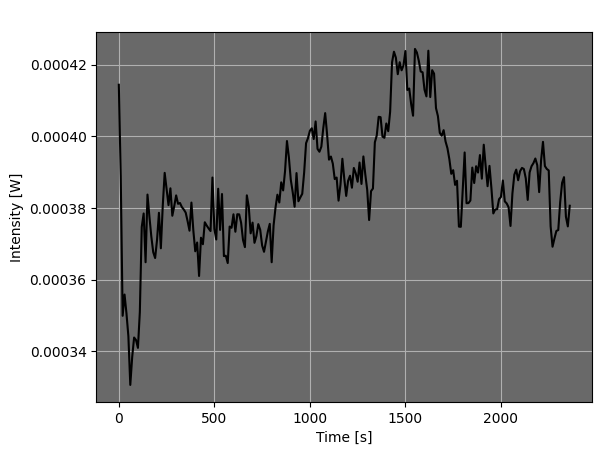

In [205]:
'''
We graph intensity vs. time (10 second incremented measurements) of our power source.
'''

plt.plot(arr,df_intensity_arr,color= 'black')
plt.title('Intensity vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [W]')
plt.grid()
plt.show()

In [206]:
randomList=[]
for i in range(1000):
   r=random.randint(0,121)
   if r not in randomList and r%2 == 0:
      randomList.append(r)

'''
Our polarizer gave an extinction angle of 52 degrees.  We counted this as 0 degrees and intended on phase shifting our angles.
So we subtracted all of our angles by 38.
'''

df_random = pd.DataFrame(randomList,columns = ['Angle'])
df_random['Shifted_Angle'] = df_random['Angle']-38
df_random

,Angle,Shifted_Angle
0,54,16
1,14,-24
2,76,38
3,4,-34
4,16,-22
...,...,...
56,0,-38
57,110,72
58,72,34
59,56,18


In [215]:
'''
While making measurements, we turned the polarizer angle to the next random number generated in the previous cell, until
all data points were taken.  We then saved each into a .csv file format.  The files were under naming convention:

n20.csv,n18.csv...0.csv,2.csv...100.csv

We cleaned the data, took averages of each file and arranged them all in an array.  We also made an array of the angles.
'''


avrg = []
angle = []

for i in reversed(range(2,21,2)):
    string = 'n' + str(i) + '.csv'
    df = pd.read_csv(string, sep='delimiter',engine='python')
    df = df[12:14]
    df.columns=['itr']
    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)
    df = pd.DataFrame(lines)
    intensity = df[3]  
    intensity = intensity.values.tolist()
    for j in range(0, len(intensity)):
        intensity[j] = float(intensity[j])
    avg = np.mean(intensity)
    avrg.append(avg)
    angle.append(-i)

for i in range(0,101,2):
    string = str(i) + '.csv'
    df = pd.read_csv(string, sep='delimiter',engine='python')
    df = df[12:14]
    df.columns=['itr']
    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)
    df = pd.DataFrame(lines)
    intensity = df[3]
    intensity = intensity.values.tolist()
    for j in range(0, len(intensity)):
        intensity[j] = float(intensity[j])
    avg = np.mean(intensity)
    avrg.append(avg)
    angle.append(i)

In [216]:
%%capture
'''
Finds fit with highest r2_score.  We don't use this fit, but it is useful because it provides the scaling factor we
need in order to to fit the cos^2 function later.
'''

r2_search = []
for i in range(1,100):

    model = np.poly1d(np.polyfit(angle,avrg,i))
    line = np.linspace(-20,100,60)
    r2 = r2_score(avrg,model(angle))
    r2_search.append(r2)
    
max_r2 = r2_search.index(max(r2_search))

In [209]:
'''
Creates the cos^2 function we are trying to fit.  We use our 'best r_2' model to scale the amplitude.
'''

values = []
for angles in range(len(angle)):
    value = max(model(line))*np.cos(np.deg2rad(angle[angles]))**2
    values.append(value)

In [217]:
%%capture
'''
The fit we used before was only to maximize the r2 score to match our data.  This was only intended to be used to generate
the scaling factor for our cos^2 curve.

We now create a new model that minimizes variance between the regression and the cos^2 function.
'''

variance = []
for i in range(1,150):

    model = np.poly1d(np.polyfit(angle,avrg,i))
    line = np.linspace(-20,100,60)
    dist = np.mean(np.abs(model-values))
    variance.append(dist)
    
best_fit = variance.index(min(variance))

model = np.poly1d(np.polyfit(angle,avrg,best_fit))
line = np.linspace(-20,100,60)

In [211]:
'''
Since the cos^2 function is continuous, we break it down to match the shape of our angle vector.
'''

cos_values = []

for angles in angle:
    cos_value = max(model(line))*np.cos(np.deg2rad(angles))**2
    cos_values.append(cos_value)

In [212]:
'''
A few of our vectors carry an extra data point, so we pop it out.
'''

cos_pop = cos_values.copy()
cos_pop.pop()
angle_pop = angle.copy()
angle_pop.pop()
avrg_pop = avrg.copy()
avrg_pop.pop()
values_pop = values.copy()
values_pop.pop()

'''
Doing this, we are able to calculate mean squared error between our regression curve and our cos^2 function
'''

mse = mean_squared_error(cos_pop,model(line))

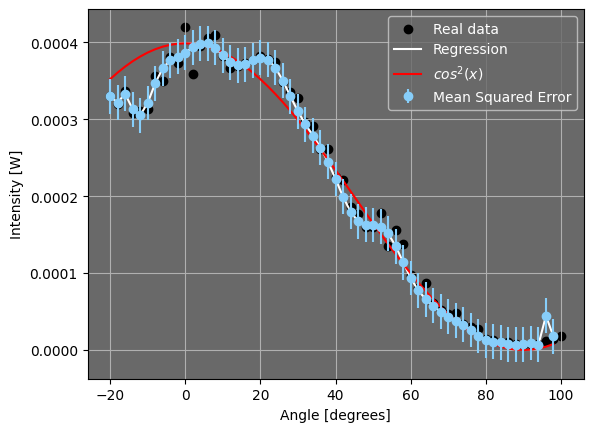

In [214]:
'''
Lastly, we are able to fit our 'best fit' regression curve to the data with error bars based on the mean squared error.
'''
plt.scatter(angle,avrg,color = 'black',label = 'Real data')
plt.plot(angle_pop,model(line),color='white',label = 'Regression')
plt.plot(angle_pop,values_pop,color = 'r',label = '$cos^{2}(x)$')
plt.xlabel('Angle [degrees]')
plt.ylabel('Intensity [W]')
plt.grid()
plt.errorbar(angle_pop,model(line),np.sqrt(mse),color='lightskyblue',label='Mean Squared Error',fmt='o')
plt.legend()
plt.rcParams['axes.facecolor'] = 'dimgrey'
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "black"})
plt.show()